## Problem Statement, Business context and objective 



-- Look into the slides

***Learn about implementation of a machine learning algorithm using autoencoders for anomaly detection.***

# Fraud Detection

•	What is Fraud Detection?

>  ***Fraud detection is a set of activities undertaken to prevent money or property from being obtained through false pretenses. Fraud detection is applied to many industries such as banking or insurance. In banking, fraud may include forging checks or using stolen credit cards.***

•	Why we are using  fraud dataset for this problem ?


> ***For this task, we are using Kaggle’s credit card fraud dataset. The Dataset gives >39,000 instances of credit card use, and for each transaction we know whether it is fraudulent or not. Anomaly detection is used with dataset which are severly unbalanced. In this case, only 0.26% of all transaction are fraudulent.***



•	Algorithms used to solve this problem


> ***While we could try to work with classifiers, like random forests or support vector machines, by applying over- or under-sampling techniques, we can alternatively try to find anomalies in the data (assuming our fraud cases to be anomalies within the whole dataset). In this notebook, we will be using autoencoders deep learning model for anomaly detection.***




### Install & Import necessary packages

> ***Install caret, e1071 & ROCR required for data-preprocessing, visualization & model metrics***



In [ ]:
install.packages('caret')
install.packages('e1071')
install.packages('ROCR')  

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’




> ***The R package h2o provides a convenient interface to H2O, which is an open-source machine learning and deep learning platform. H2O distributes a wide range of common machine learning algorithms for classification, regression and deep learning.***

In [ ]:
install.packages("h2o", repos=(c("http://s3.amazonaws.com/h2o-release/h2o/master/1497/R", getOption("repos"))))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RCurl’




> ***Activating libraries***

In [ ]:
library(tidyverse)
library(caret)
library(e1071)
options(warn=-1)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




### Load Credit Card Fraudulent Data

> ***Import datasource from csv to dataframe***


In [ ]:
creditcard <- read.csv("creditcard.csv")

### Exploratory Data Analysis

> ***The dataset contains numerical input variables V1 to V28, which are the result of a PCA transformation of the original features (which could not be provided due to confidentiality issues).
The response variable Class tell us whether a transaction was fraudulent (value = 1) or not (value = 0). 
There are two additional features, Time (time in seconds between each transaction and the first transaction) and Amount (how much money was transferred in this transaction)***

In [ ]:
# to get numbver of rows and columns in dataset - (39999 rows and 31 columns)

nrow(creditcard)
ncol(creditcard)

[1] 39999

[1] 31

In [ ]:
# to get top 5 rows 

head(creditcard)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.11047391,0.06692808,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
2,0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
3,1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
4,1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
5,2,-1.1582331,0.87773676,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
6,2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


> ***Distribution of target variable (Class).
39895 Non-Fraudulent transaction ,104 Fraudulent transaction***



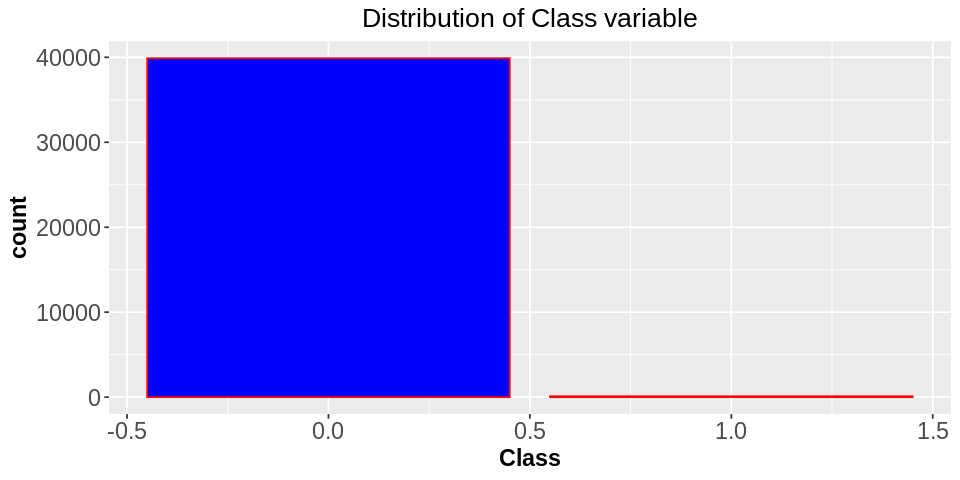

In [ ]:
# Bar plot to understand distribution of dependent variable using ggplot function. 
# We see that data is very much imbalanced
# 104 Fraudulent transaction and 39895 Non-Fraudulent transaction

options(repr.plot.width=8, repr.plot.height=4)
creditcard %>% ggplot(aes(x = Class)) + 
  geom_bar(color = "red", fill = "blue") + 
  theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold"),
        legend.text=element_text(size=14),
        legend.title=element_text(size=14),
        plot.title = element_text(size=16,hjust = 0.5)) +
  ggtitle("Distribution of Class variable")



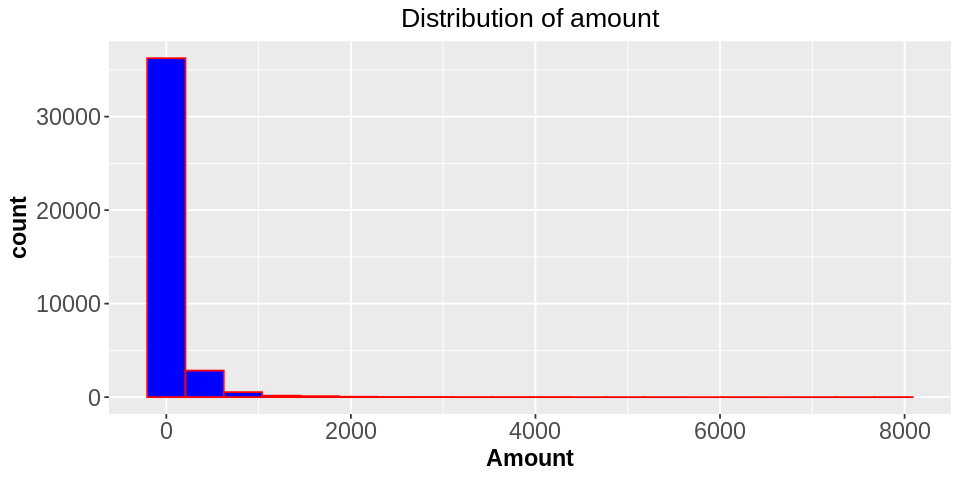

In [ ]:
# Histogram to understand distribution of amount varoable using geom_histogram function
# We see that majority of trans are withing 500


creditcard %>%
  ggplot(aes(x = Amount)) +
    geom_histogram(color = "red", fill = "blue", bins = 20) +
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold"),
        legend.text=element_text(size=14),
        legend.title=element_text(size=14),
        plot.title = element_text(size=16,hjust = 0.5)) +
    ggtitle("Distribution of amount")

> ***We can see that Fraudulent transaction has higher mean amount of money. However max amount is much lower when compared to regular transaction***

In [ ]:
# Summary of amount for both the classes(Fraudulent and non-Fraudulent)

cat("Amount summary with Class 0\n")
summary(creditcard[creditcard$Class == "0", ]$Amount)
cat('\nAmount  summary with Class 1\n')
summary(creditcard[creditcard$Class == "1", ]$Amount)


Amount summary with Class 0


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    7.46   23.69   87.57   79.00 7879.42 


Amount  summary with Class 1


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.000    1.000    3.775   97.071   99.990 1809.680 

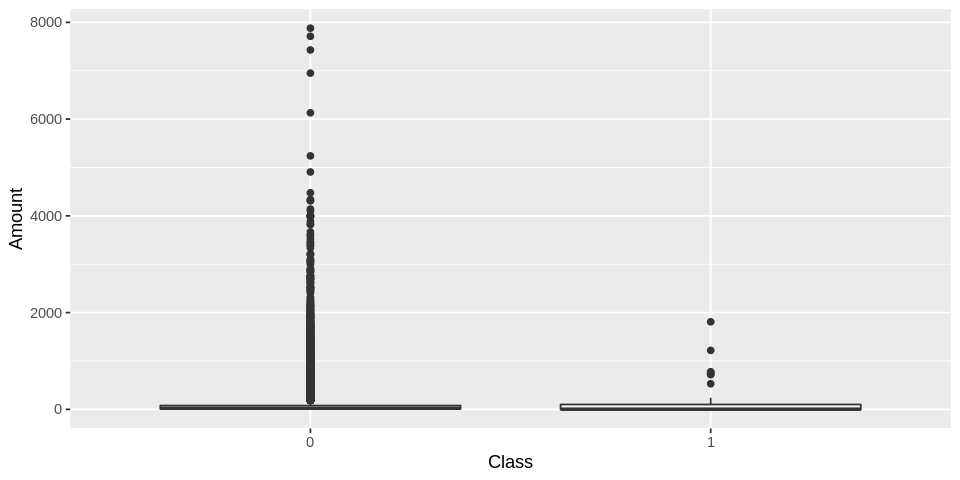

In [ ]:
# Box plots of amount for both the classes(Fraudulent and non-Fraudulent)
# Lot of outliers in class 0
# Amount Mean of Fraudulent is more than non-Fraudulent)

creditcard$Class = as.factor(creditcard$Class)
p <- ggplot(creditcard, aes(x=Class, y=Amount)) + 
  geom_boxplot()
p

## Modeling

### Preparing the data 

> ***Activate h2o and instantiate an instance***

In [ ]:
library(h2o)
h2o.init(nthreads = -1)


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit https://docs.h2o.ai

----------------------------------------------------------------------



Attaching package: ‘h2o’


The following objects are masked from ‘package:stats’:

    cor, sd, var


The following objects are masked from ‘package:base’:

    &&, %*%, %in%, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc





H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /tmp/RtmpdembeV/file3d82cfeff/h2o_UnknownUser_started_from_r.out
    /tmp/RtmpdembeV/file3d5123fca9/h2o_UnknownUser_started_from_r.err


Starting H2O JVM and connecting: ... Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         3 seconds 229 milliseconds 
    H2O cluster timezone:       Etc/UTC 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.32.1.3 
    H2O cluster version age:    23 days  
    H2O cluster name:           H2O_started_from_R_root_sxn786 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.17 GB 
    H2O cluster total cores:    2 
    H2O cluster allowed cores:  2 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         

> ***Convert data to H2OFrame***

In [ ]:
# converting into h2o frame

creditcard_hf <- as.h2o(creditcard)

  |======================================================================| 100%


**>Splitting data into training and test set.**

In [ ]:
splits <- h2o.splitFrame(creditcard_hf, ratios = c(0.75), seed = 1234) 
train <- splits[[1]] 
test <- splits[[2]] 

In [ ]:
nrow(train)

[1] 30073

> ***Separate dependent and independent variables***

In [ ]:
response <- "Class" 
features <- setdiff(colnames(train), response)

### Deep Learning with Autoencoders
*   Understanding neural networks
> ***Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. A neural network works similarly to the human brain’s neural network. A “neuron” in a neural network is a mathematical function that collects and classifies information according to a specific architecture. The network bears a strong resemblance to statistical methods such as curve fitting and regression analysis.***
*   Understanding deep neural networks
> ***A deep neural network (DNN) is an artificial neural network (ANN) with multiple layers between the input and output layers.***                                                  
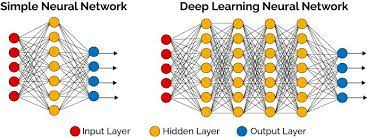
*   Understanding auto encoders
> ***AutoEncoder is a generative unsupervised deep learning algorithm used for reconstructing high-dimensional input data using a neural network. The Autoencoder accepts high-dimensional input data, compress it down to the latent-space representation in the bottleneck hidden layer; the Decoder takes the latent representation of the data as an input to reconstruct the original input data. For Anomaly detection, we use Autoencoders which tries to minimize the reconstruction error as part of its training. Then anomalies are detected by checking the magnitude of the reconstruction loss.***
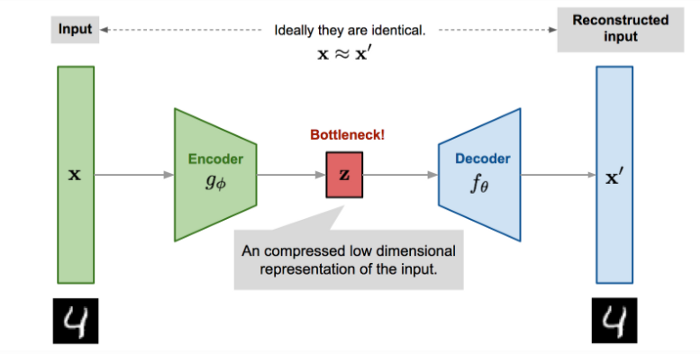










Source if Image : https://lilianweng.github.io/lil-log/2018/08/12/from-autoencoder-to-beta-vae.html

##Supervised Learning

> ***Define independent feature space***

In [ ]:
# extracting feature names

features <- setdiff(colnames(train), response)

In [ ]:
# converting class into factor

features_new <- train %>%
  as.data.frame() %>%
  mutate(Class = as.factor(as.vector(train[, 31]))) %>%
  as.h2o()

  |======================================================================| 100%


> ***Lets train supervised deep neural network to detect anomaly***

*   response -> target variable (Class)
*   features_new -> column names of dimensionally reduced features
*   reproducible = TRUE -> to obtain reproducible results
*   balance_classes = TRUE -> Used to balance class distribution by under or oversampling. However model will correct final probabilities with monotonic transform
*   ignore_const_cols = FALSE -> Since variable are PCA transformed, turn-off ignore constant columns
*   hidden = c(5, 2, 5) -> Hidden layer with 10-2-10 units
*   epochs = 50 -> No. of passes of entire Dataset
*   activation = "Maxout" -> Maxout activation function





In [ ]:
# model with Maxout and hidden layer of (30, 5, 10)

model_supervised <- h2o.deeplearning(y = response,
                               x = features,
                               training_frame = features_new,
                               reproducible = TRUE, 
                               balance_classes = TRUE,
                               ignore_const_cols = FALSE,
                               hidden = c(5, 2, 5), 
                               epochs = 50,
                               activation = "Maxout")
model_supervised

  |======================================================================| 100%


Model Details:

H2OBinomialModel: deeplearning
Model ID:  DeepLearning_model_R_1623480385998_120 
Status of Neuron Layers: predicting Class, 2-class classification, bernoulli distribution, CrossEntropy loss, 376 weights/biases, 11.6 KB, 1,139,829 training samples, mini-batch size 1
  layer units    type dropout       l1       l2 mean_rate rate_rms momentum
1     1    30   Input  0.00 %       NA       NA        NA       NA       NA
2     2     5  Maxout  0.00 % 0.000000 0.000000  0.218680 0.380684 0.000000
3     3     2  Maxout  0.00 % 0.000000 0.000000  0.477328 0.459358 0.000000
4     4     5  Maxout  0.00 % 0.000000 0.000000  0.513794 0.483141 0.000000
5     5     2 Softmax      NA 0.000000 0.000000  0.107954 0.107234 0.000000
  mean_weight weight_rms mean_bias bias_rms
1          NA         NA        NA       NA
2    0.023194   0.339838  0.582665 0.117316
3    0.245247   0.771337  1.068613 0.101375
4   -0.128191   0.825436  0.967918 0.091603
5    0.965039   1.970963 -0.003290 0.1293

In [ ]:
# Lets predict using the above model for test data

pred <- as.data.frame(h2o.predict(object = model_supervised, newdata = test)) %>%  mutate(actual = as.vector(test[, 31]))

  |======================================================================| 100%


In [ ]:
# pred dataset has both actual and predicted values

head(pred)

,predict,p0,p1,actual
,<fct>,<dbl>,<dbl>,<int>
1,0,1,5.299578e-32,0
2,0,1,1.454478e-24,0
3,0,1,6.403750e-50,0
4,0,1,3.109573e-21,0
5,0,1,1.887973e-31,0
6,0,1,7.340428e-37,0


In [ ]:
# confusion matrix on test data

Cmatrix <- confusionMatrix(data=factor(pred$predict), reference = factor(as.vector(test[, 31])))
Cmatrix

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 9895    6
         1    6   19
                                          
               Accuracy : 0.9988          
                 95% CI : (0.9979, 0.9994)
    No Information Rate : 0.9975          
    P-Value [Acc > NIR] : 0.003116        
                                          
                  Kappa : 0.7594          
                                          
 Mcnemar's Test P-Value : 1.000000        
                                          
            Sensitivity : 0.9994          
            Specificity : 0.7600          
         Pos Pred Value : 0.9994          
         Neg Pred Value : 0.7600          
             Prevalence : 0.9975          
         Detection Rate : 0.9969          
   Detection Prevalence : 0.9975          
      Balanced Accuracy : 0.8797          
                                          
       'Positive' Class : 0               
                        

In [ ]:
# model with Tanh and hidden layer of (20, 5, 20)

model_supervised2 <- h2o.deeplearning(y = response,
                               x = features,
                               training_frame = features_new,
                               reproducible = TRUE, 
                               balance_classes = TRUE,
                               ignore_const_cols = FALSE,
                               hidden = c(20, 5, 20), 
                               epochs = 50,
                               activation = "Tanh")
model_supervised2

  |======================================================================| 100%


Model Details:

H2OBinomialModel: deeplearning
Model ID:  DeepLearning_model_R_1623480385998_141 
Status of Neuron Layers: predicting Class, 2-class classification, bernoulli distribution, CrossEntropy loss, 887 weights/biases, 17.8 KB, 119,976 training samples, mini-batch size 1
  layer units    type dropout       l1       l2 mean_rate rate_rms momentum
1     1    30   Input  0.00 %       NA       NA        NA       NA       NA
2     2    20    Tanh  0.00 % 0.000000 0.000000  0.574951 0.288947 0.000000
3     3     5    Tanh  0.00 % 0.000000 0.000000  0.439373 0.271613 0.000000
4     4    20    Tanh  0.00 % 0.000000 0.000000  0.848320 0.143251 0.000000
5     5     2 Softmax      NA 0.000000 0.000000  0.988510 0.017135 0.000000
  mean_weight weight_rms mean_bias bias_rms
1          NA         NA        NA       NA
2    0.000393   0.214171  0.077571 0.159241
3    0.002251   0.300010 -0.159522 0.453505
4    0.010633   0.351343 -0.020513 0.383671
5    0.333227   1.498868  0.000000 0.591774

In [ ]:
# Lets predict using the above model for test data

pred <- as.data.frame(h2o.predict(object = model_supervised2, newdata = test)) %>%  mutate(actual = as.vector(test[, 31]))

Cmatrix <- confusionMatrix(data=factor(pred$predict), reference = factor(as.vector(test[, 31])))
Cmatrix

  |======================================================================| 100%


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 9892    5
         1    9   20
                                          
               Accuracy : 0.9986          
                 95% CI : (0.9976, 0.9992)
    No Information Rate : 0.9975          
    P-Value [Acc > NIR] : 0.01232         
                                          
                  Kappa : 0.74            
                                          
 Mcnemar's Test P-Value : 0.42268         
                                          
            Sensitivity : 0.9991          
            Specificity : 0.8000          
         Pos Pred Value : 0.9995          
         Neg Pred Value : 0.6897          
             Prevalence : 0.9975          
         Detection Rate : 0.9966          
   Detection Prevalence : 0.9971          
      Balanced Accuracy : 0.8995          
                                          
       'Positive' Class : 0               
                        

### Precision-recall curve

> ***Given bias in class variable, lets do a precison recall curve***

In [ ]:
library(ROCR)

#function to generate the curve
line_int <- function(x, y) {
  dx <- diff(x)
  end <- length(y)
  my <- (y[1:(end - 1)] + y[2:end]) / 2
  sum(dx * my)
} 


prediction_output <- prediction(pred$p1, pred$actual)

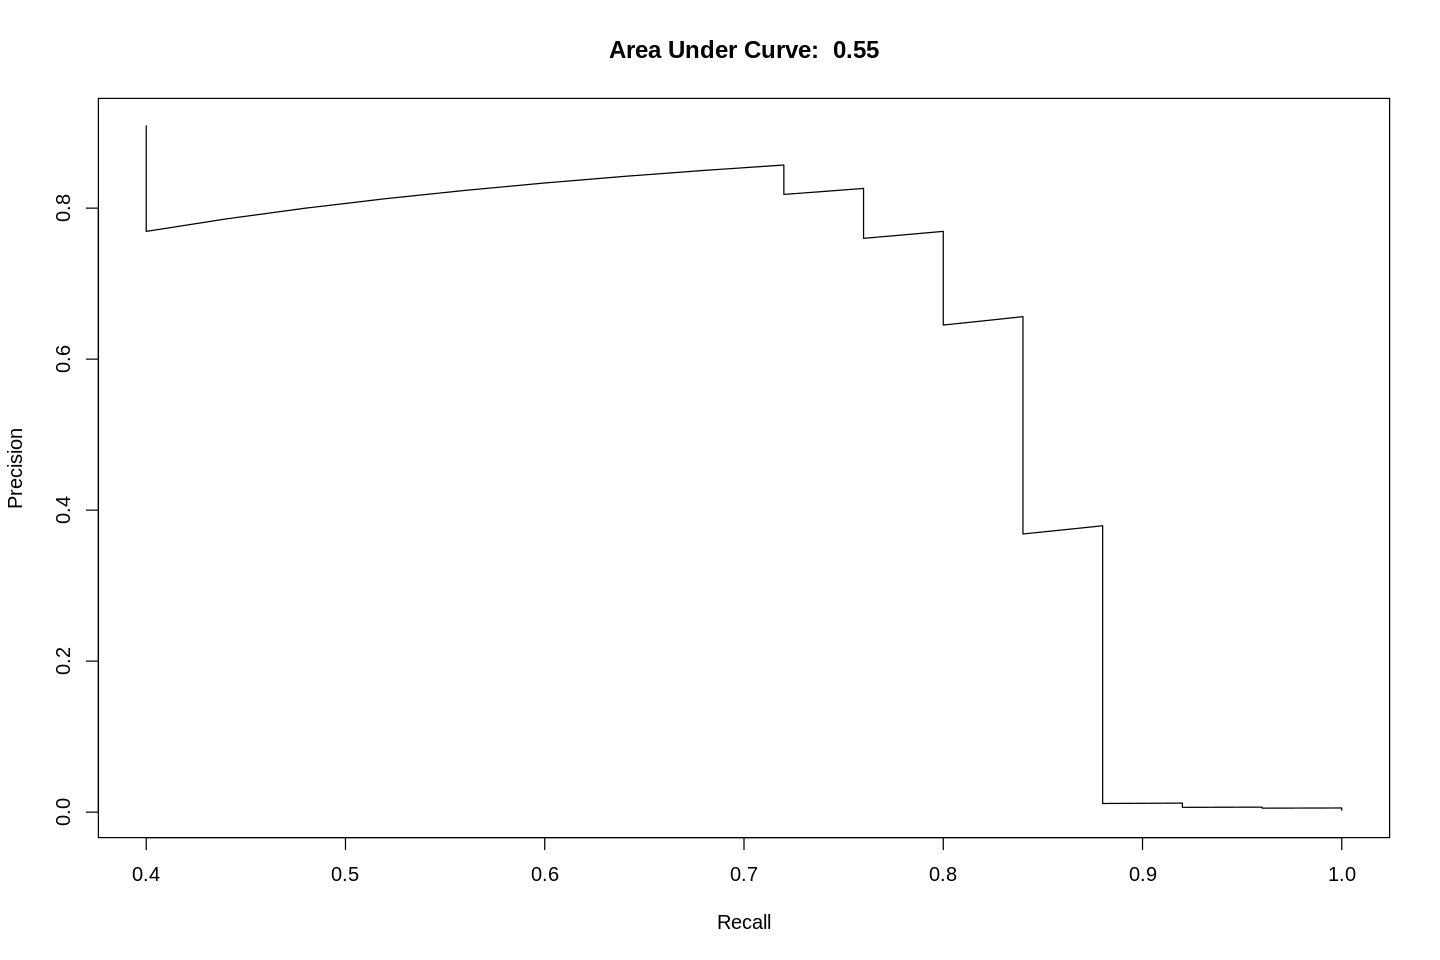

In [ ]:
# precision-recall curve
perf1 <- performance(prediction_output, measure = "prec", x.measure = "rec") 
x <- perf1@x.values[[1]]
y <- perf1@y.values[[1]]
y[1] <- 0

#plotting the curve
plot(perf1, main = paste("Area Under Curve: ", round(abs(line_int(x,y)), digits = 3)))


> ***Try  different prediction thresholds and calculating how many cases were correctly classified in the two classes***

`summarise()` has grouped output by 'actual', 'x'. You can override using the `.groups` argument.



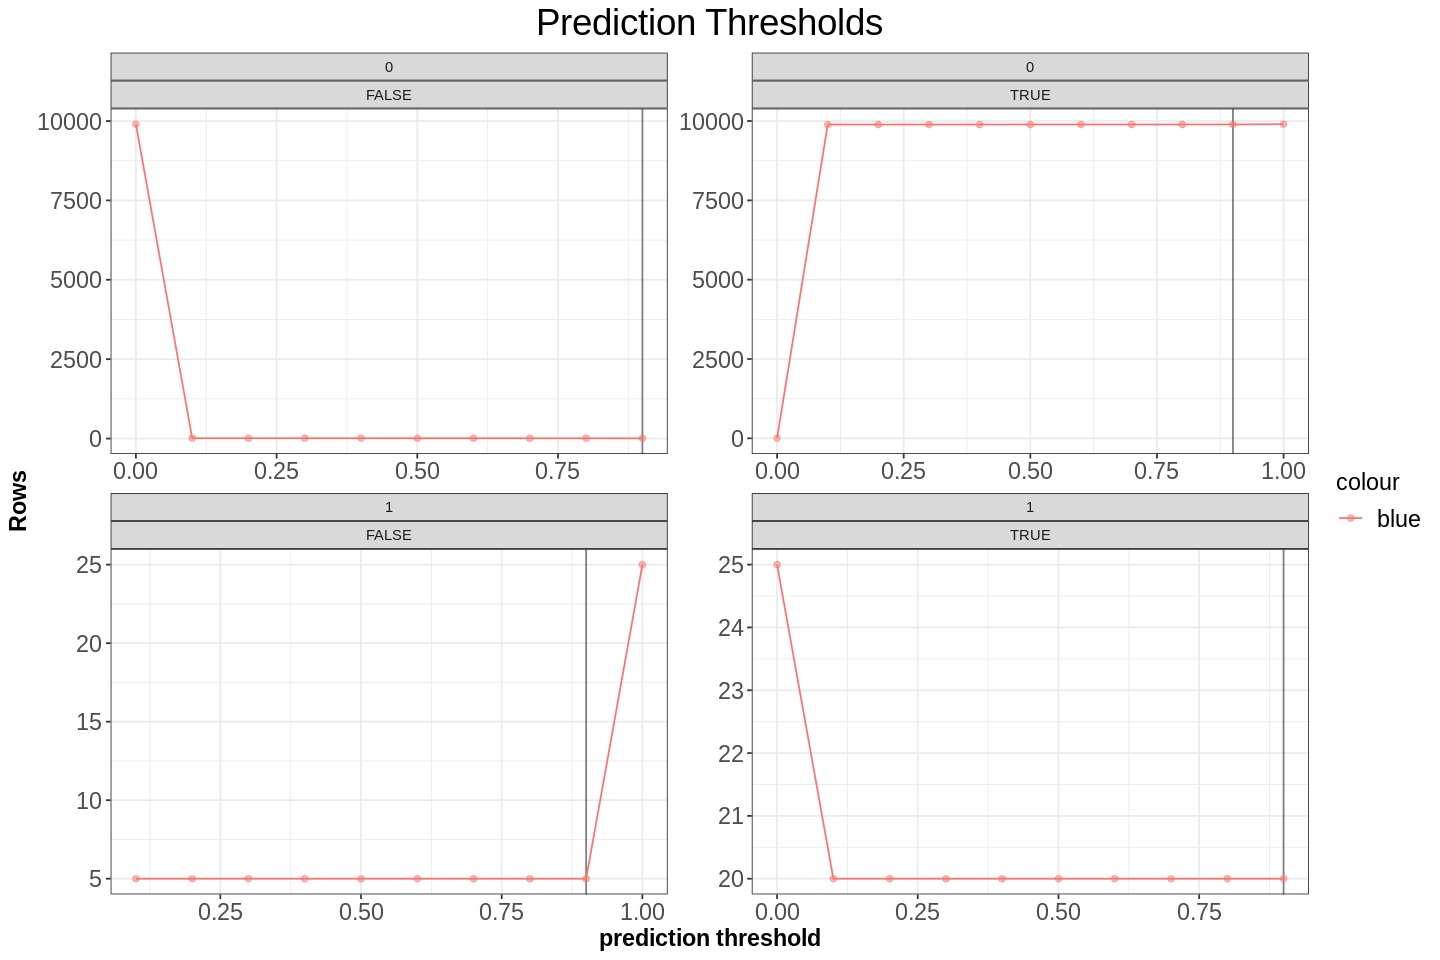

In [ ]:
thresholds <- seq(from = 0, to = 1, by = 0.1)
pred_thresholds <- data.frame(actual = pred$actual)

for (threshold in thresholds) {  
  prediction <- ifelse(pred$p1 > threshold, 1, 0)
  prediction_true <- ifelse(pred_thresholds$actual == prediction, TRUE, FALSE)
  pred_thresholds <- cbind(pred_thresholds, prediction_true)
}

colnames(pred_thresholds)[-1] <- thresholds
options(repr.plot.width=12, repr.plot.height=8)
pred_thresholds %>%
  gather(x, y, 2:ncol(pred_thresholds)) %>%
  group_by(actual, x, y) %>%
  summarise(n = n()) %>%
  ggplot(aes(x = as.numeric(x), y = n, color = "blue")) +
    geom_vline(xintercept = 0.9, alpha = 0.5) +
    geom_line() +
    geom_point(alpha = 0.5) +
    theme_bw() +
    facet_wrap(actual ~ y, scales = "free", ncol = 2) +
    labs(x = "prediction threshold",
         y = "Rows")+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold"),
        legend.text=element_text(size=14),
        legend.title=element_text(size=14),
        plot.title = element_text(size=22,hjust = 0.5)) +
    ggtitle("Prediction Thresholds")

> ***Even if we increase the threshhold from 0.5 to 0.8, no change are observed***

In [ ]:
pred %>%
  mutate(predict = ifelse(pred$p1 > 0.8, 1, 0))

predict,p0,p1,actual
<dbl>,<dbl>,<dbl>,<int>
0,1,1.344178e-14,0
0,1,2.950177e-19,0
0,1,5.754094e-26,0
0,1,5.513066e-18,0
0,1,6.553214e-29,0
0,1,1.559298e-15,0
0,1,9.801440e-20,0
0,1,2.752430e-15,0
0,1,2.047635e-12,0


In [ ]:
Cmatrix <- confusionMatrix(data=factor(pred$predict), reference = factor(as.vector(test[, 31])))
Cmatrix

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 9895    6
         1    6   19
                                          
               Accuracy : 0.9988          
                 95% CI : (0.9979, 0.9994)
    No Information Rate : 0.9975          
    P-Value [Acc > NIR] : 0.003116        
                                          
                  Kappa : 0.7594          
                                          
 Mcnemar's Test P-Value : 1.000000        
                                          
            Sensitivity : 0.9994          
            Specificity : 0.7600          
         Pos Pred Value : 0.9994          
         Neg Pred Value : 0.7600          
             Prevalence : 0.9975          
         Detection Rate : 0.9969          
   Detection Prevalence : 0.9975          
      Balanced Accuracy : 0.8797          
                                          
       'Positive' Class : 0               
                        

## Unsupervised Learning

First, we are training the unsupervised neural network model using deep learning autoencoders. With h2o, we can simply set autoencoder = TRUE. Here, we are applying a technique called “bottleneck” training, where the hidden layer in the middle is very small. This means that model will have to reduce the dimensionality of the input data (in this case, down to 2 nodes/dimensions). The autoencoder model will then learn the patterns of the input data irrespective of given class labels. Here, it will learn, which credit card transactions are similar and which transactions are outliers or anomalies

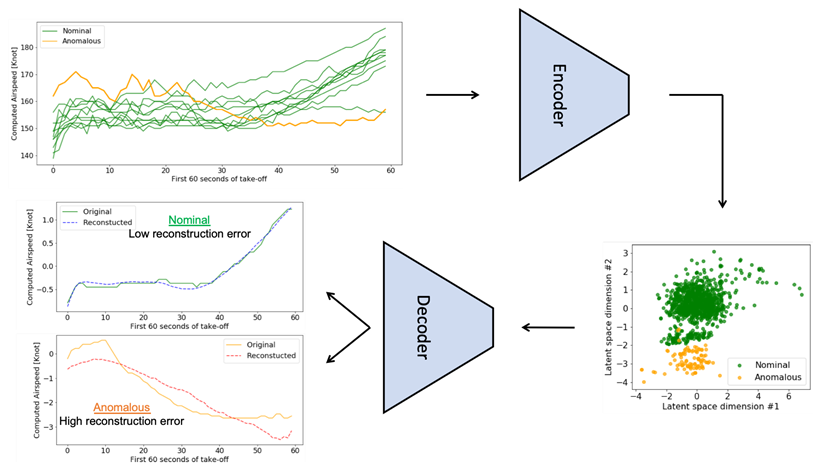

Source : https://www.mdpi.com/2226-4310/7/8/115/htm


autoencoder=TRUE -> Generate Autoencoder deep neural network

features -> Independent Variables (Time,Amount,V1 to V28)
train -> training data

model_unsupervised -> Model name

reproducible = TRUE -> to obtain reproducible results

ignore_const_cols = FALSE -> Since variable are PCA 

transformed, turn-off ignore constant columns

hidden = c(20, 5, 10) -> Hidden layer with 20, 5, 10 units

epochs = 50 -> No. of passes of entire Dataset

activation = "TanhWithDropout" -> Rectifier activation function







In [ ]:
# Train the unsupervised model using autoencoder

model_unsupervised  <- h2o.deeplearning(x = features, training_frame = train, 
                             model_id = "model_unsupervised", autoencoder = TRUE, 
                             reproducible = TRUE, 
                             ignore_const_cols = FALSE,
                             hidden = c(20, 5, 10), 
                             epochs = 50, activation = "TanhWithDropout")
model_unsupervised

  |======================================================================| 100%


Model Details:

H2OAutoEncoderModel: deeplearning
Model ID:  model_unsupervised 
Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 1,115 weights/biases, 20.6 KB, 1,404,500 training samples, mini-batch size 1
  layer units        type dropout       l1       l2 mean_rate rate_rms momentum
1     1    30       Input  0.00 %       NA       NA        NA       NA       NA
2     2    20 TanhDropout 50.00 % 0.000000 0.000000  0.000002 0.000003 0.000000
3     3     5 TanhDropout 50.00 % 0.000000 0.000000  0.014181 0.013221 0.000000
4     4    10 TanhDropout 50.00 % 0.000000 0.000000  0.035587 0.030788 0.000000
5     5    30        Tanh      NA 0.000000 0.000000  0.012774 0.015264 0.000000
  mean_weight  weight_rms    mean_bias    bias_rms
1          NA          NA           NA          NA
2   -0.215006   31.801926  -117.134666  207.126648
3   79.466431 3158.083984 -1934.467211 3620.479492
4    0.819946   34.603958   -11.767045   26.059212
5   -0.002179    0.014202    

## Train the unsupervised model using activation function= Tanh

In [ ]:
# Train the unsupervised model using autoencoder

model_unsupervised2  <- h2o.deeplearning(x = features, training_frame = train, 
                             model_id = "model_unsupervised", autoencoder = TRUE, 
                             reproducible = TRUE, 
                             ignore_const_cols = FALSE,
                             hidden = c(20, 5, 20), 
                             epochs = 50, activation = "Tanh")
model_unsupervised2

  |======================================================================| 100%


Model Details:

H2OAutoEncoderModel: deeplearning
Model ID:  model_unsupervised 
Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 1,475 weights/biases, 24.9 KB, 1,503,650 training samples, mini-batch size 1
  layer units  type dropout       l1       l2 mean_rate rate_rms momentum
1     1    30 Input  0.00 %       NA       NA        NA       NA       NA
2     2    20  Tanh  0.00 % 0.000000 0.000000  0.818958 0.200002 0.000000
3     3     5  Tanh  0.00 % 0.000000 0.000000  0.116526 0.050964 0.000000
4     4    20  Tanh  0.00 % 0.000000 0.000000  0.426836 0.342767 0.000000
5     5    30  Tanh      NA 0.000000 0.000000  0.395020 0.333510 0.000000
  mean_weight weight_rms mean_bias bias_rms
1          NA         NA        NA       NA
2   -0.024669   0.372320 -0.131803 0.446788
3   -0.018474   0.161491  0.005787 0.320048
4    0.027095   0.463009 -0.082678 0.218624
5    0.011565   0.164198  0.001796 0.013389


H2OAutoEncoderMetrics: deeplearning
** Reported on tra

##Detecting anamolies

In [ ]:
anomalies <- h2o.anomaly(model_unsupervised2, train, per_feature = FALSE) %>% as.data.frame() %>% mutate(Class = as.vector(train[, 31]))
head(anomalies)

,Reconstruction.MSE,Class
,<dbl>,<int>
1,0.0010089782,0
2,0.0007183708,0
3,0.0023578548,0
4,0.0007723051,0
5,0.0005520185,0
6,0.0014447319,0


In [ ]:
# finding the threshhold

threshold <- quantile(anomalies$Reconstruction.MSE, probs = 0.995)
threshold

99.5% 
0.01817077

In [ ]:
# Anomalies on test data

test_anomalies <- h2o.anomaly(model_unsupervised2, test, per_feature = FALSE) %>% as.data.frame() %>% mutate(Class = as.vector(test[, 31]))
results <- data.frame(rbind(anomalies,test_anomalies), threshold)
results$rowname = seq.int(nrow(results)) 

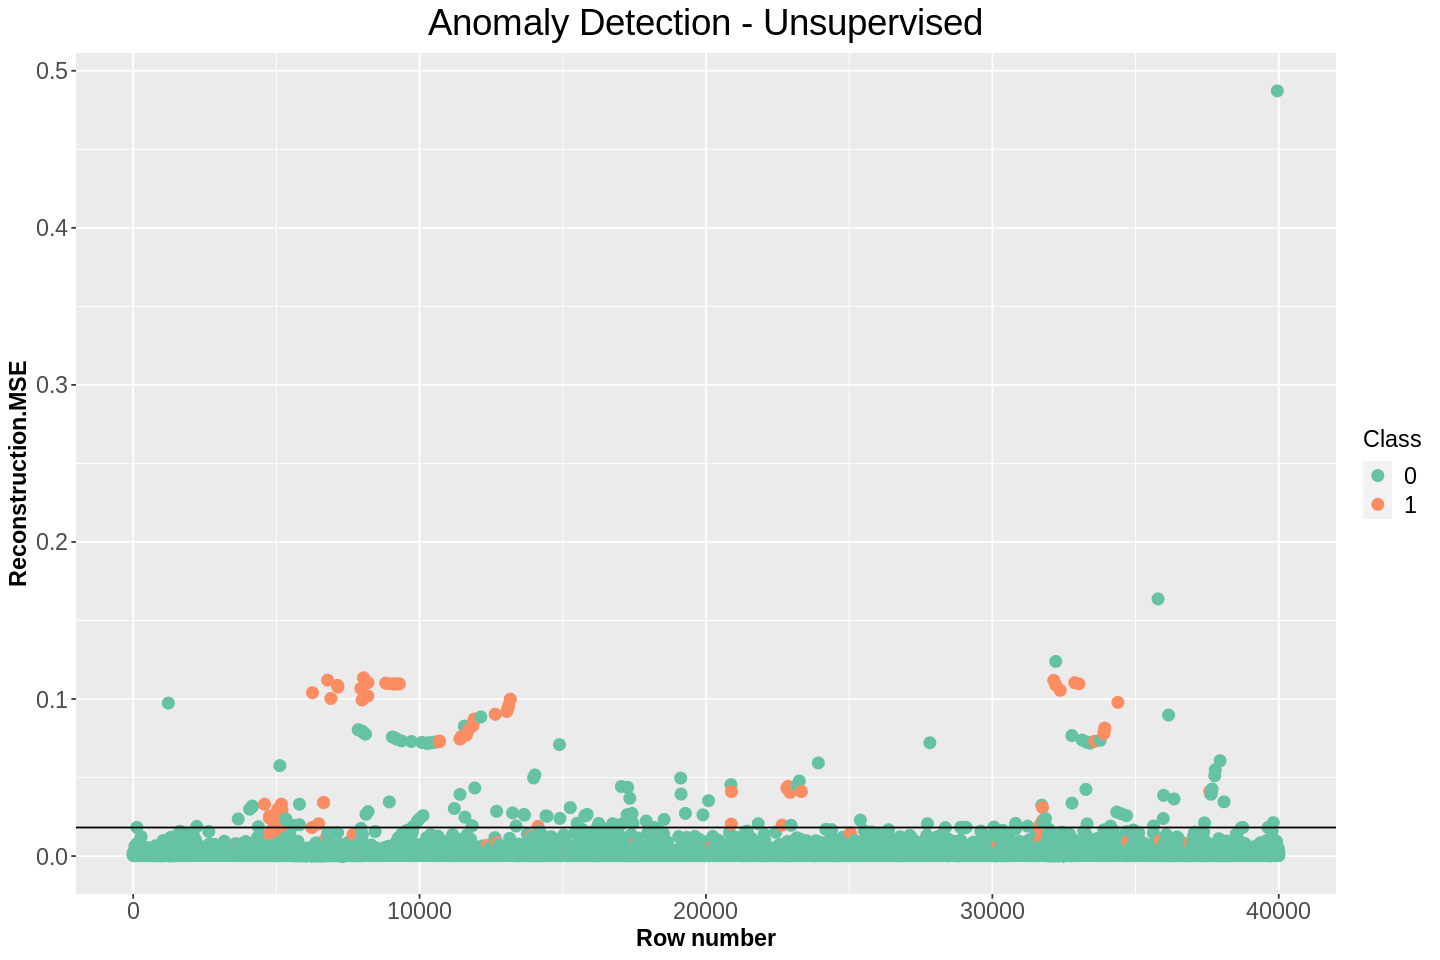

In [ ]:
# Indentifying the anomalies using graph

ggplot(results, aes(x = as.numeric(rowname), y = Reconstruction.MSE, color = as.factor(Class))) +
  geom_point(alpha = 1,size = 3) +
  geom_hline(yintercept = threshold) +
  scale_color_brewer(palette = "Set2") +
  labs(x = "Row number", color = "Class") +
  theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold"),
        legend.text=element_text(size=14),
        legend.title=element_text(size=14),
        plot.title = element_text(size=22,hjust = 0.5)) +
  ggtitle("Anomaly Detection - Unsupervised")

In [ ]:
# Confusion matrix for evaluation

matrix <- confusionMatrix(data=factor(as.integer(test_anomalies$Reconstruction.MSE > threshold)), reference = factor(as.vector(test[, 31])))
matrix

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 9864   10
         1   37   15
                                          
               Accuracy : 0.9953          
                 95% CI : (0.9937, 0.9965)
    No Information Rate : 0.9975          
    P-Value [Acc > NIR] : 0.9999725       
                                          
                  Kappa : 0.3875          
                                          
 Mcnemar's Test P-Value : 0.0001491       
                                          
            Sensitivity : 0.9963          
            Specificity : 0.6000          
         Pos Pred Value : 0.9990          
         Neg Pred Value : 0.2885          
             Prevalence : 0.9975          
         Detection Rate : 0.9938          
   Detection Prevalence : 0.9948          
      Balanced Accuracy : 0.7981          
                                          
       'Positive' Class : 0               
                        

## **Decreasing the threshhold to increase Specificity **

In [ ]:
# finding the threshhold

threshold <- quantile(anomalies$Reconstruction.MSE, probs = 0.99)

test_anomalies <- h2o.anomaly(model_unsupervised2, test, per_feature = FALSE) %>% as.data.frame() %>% mutate(Class = as.vector(test[, 31]))
results <- data.frame(rbind(anomalies,test_anomalies), threshold)
results$rowname = seq.int(nrow(results)) 

matrix <- confusionMatrix(data=factor(as.integer(test_anomalies$Reconstruction.MSE > threshold)), reference = factor(as.vector(test[, 31])))
matrix

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 9817    8
         1   84   17
                                          
               Accuracy : 0.9907          
                 95% CI : (0.9886, 0.9925)
    No Information Rate : 0.9975          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2669          
                                          
 Mcnemar's Test P-Value : 5.312e-15       
                                          
            Sensitivity : 0.9915          
            Specificity : 0.6800          
         Pos Pred Value : 0.9992          
         Neg Pred Value : 0.1683          
             Prevalence : 0.9975          
         Detection Rate : 0.9890          
   Detection Prevalence : 0.9898          
      Balanced Accuracy : 0.8358          
                                          
       'Positive' Class : 0               
                        

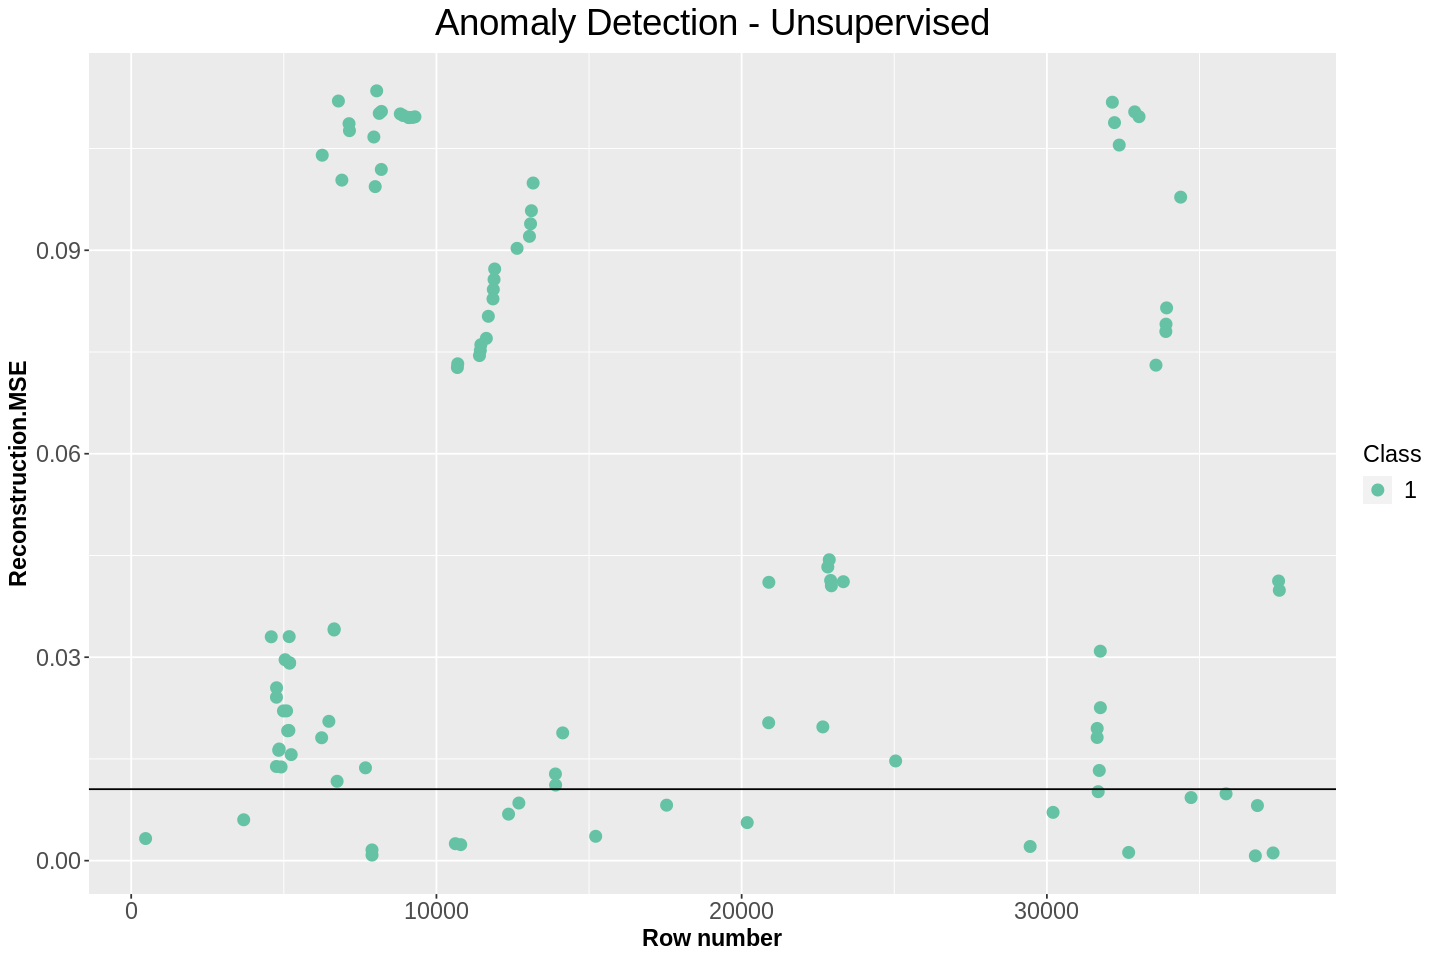

In [ ]:
results = results %>% filter(Class == "1")

ggplot(results, aes(x = as.numeric(rowname), y = Reconstruction.MSE, color = as.factor(Class))) +
  geom_point(alpha = 1,size = 3) +
  geom_hline(yintercept = threshold) +
  scale_color_brewer(palette = "Set2") +
  labs(x = "Row number", color = "Class") +
  theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold"),
        legend.text=element_text(size=14),
        legend.title=element_text(size=14),
        plot.title = element_text(size=22,hjust = 0.5)) +
  ggtitle("Anomaly Detection - Unsupervised")

# Conclusion

> ***Supervised learning is the scenario in which the model is trained on the labeled data, and trained model will predict the unseen data.  Whereas in unsupervised learning, no labels are presented for data to train upon. Each of the methodologies has its advantages, and disadvantages like supervised learning models do produce highly accurate results, whereas unsupervised learning models do not improve performance over the period.***

> ***And when we have majority of data with no label and some data with labels, we utilize hybrid semi-supervised learning for anomaly detection***

> ***All three techniques have been discussed in this notebook and almost all of them showed similar results. Depending on the dataset & usecase, appropriate technique should be chosen***